---
title: "Introducing Image Processing and scikit-image"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-08"
categories: [python, datacamp, machine learning, image processing]
image: "intoducingImageProcessing.png"

---

# Introducing Image Processing and scikit-image

Learn how to process digital image structures! NumPy and Scikit-image can be used to extract data, transform images, and analyze them. In just a few lines of code, you will be able to convert RGB images to grayscale, extract data from them, generate histograms containing valuable information, and separate objects from backgrounds.

This **Introducing Image Processing and scikit-image** is part of [Datacamp course: Image Processing in Python] There are images everywhere! Today, images contain a great deal of information that is sometimes difficult to access. Thus, image pre-processing has become a highly valuable skill, applicable to a wide range of applications. As a result of taking this course, you will be able to process, transform, and manipulate images at your discretion, no matter how many there are. Additionally, you will learn how to use scikit-image to restore damaged images, perform noise reduction, smart-resize images, count the number of dots on a dice, apply facial detection, and much more. You will be able to apply your knowledge of machine learning and artificial intelligence, machine and robotic vision, space and medical image analysis, retailing, and many other fields after completing this course. Take the step and dive into the wonderful world of computer vision!

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Image Processing in Python]: (https://app.datacamp.com/learn/courses/image-processing-in-python)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make images come alive with scikit-image

* Purpose
    * Visualization: Objects that are note visible
    * Image sharpening and restoration: A better image
    * Image retrieval: Seek for the image of interest
    * Measurement of pattern: Measures various objects
    * Image recognition: Distinguish objects in an image
* Scikit-Image
    * Easy to use
    * Make use of ML
    * Out of the box complex algorithm

## Is this gray or full of color?
Whats the main difference between the images shown below?

These images have been preloaded as coffee_image and coins_image from the scikit-image data module using:

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [4]:
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()

In [5]:
coffee_image.shape


(400, 600, 3)

In [6]:
coins_image.shape

(303, 384)

## RGB to grayscale
In this exercise you will load an image from scikit-image module data and make it grayscale, then compare both of them in the output.

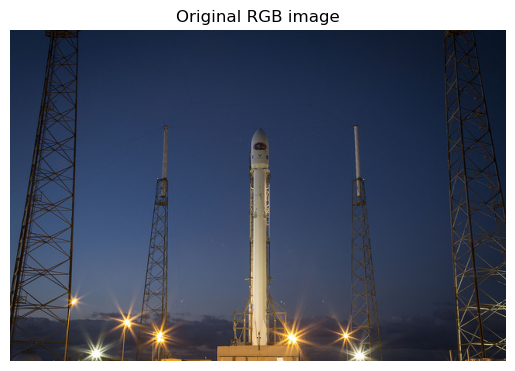

In [ ]:
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image');

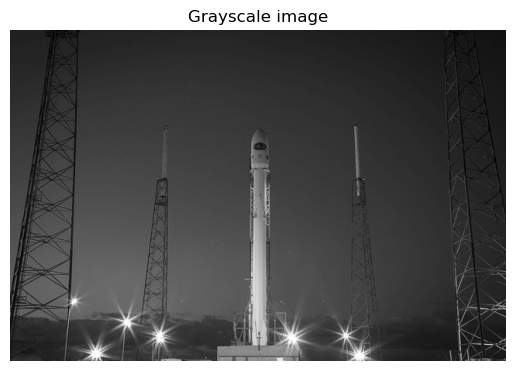

In [8]:
show_image(gray_scaled_rocket, 'Grayscale image')

## NumPy for images
Flipping out
As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the show_image() function.

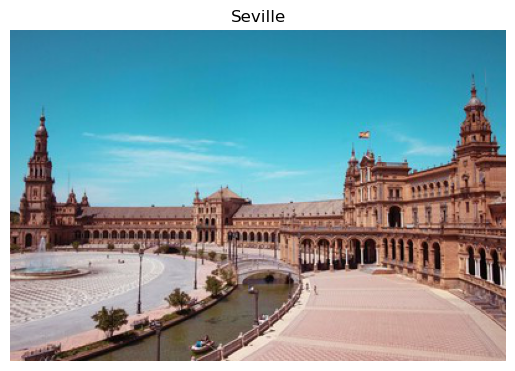

In [11]:
org_seville = plt.imread('dataset/sevilleup.jpg')
flipped_seville = plt.imread('dataset/sevilleup.jpg')

# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

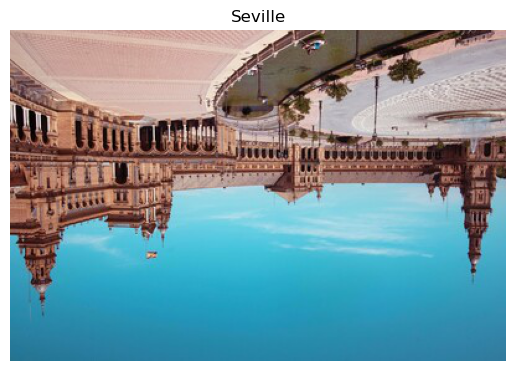

In [12]:
# Show the original image
show_image(org_seville, 'Seville')

## Histograms
In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:

Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.

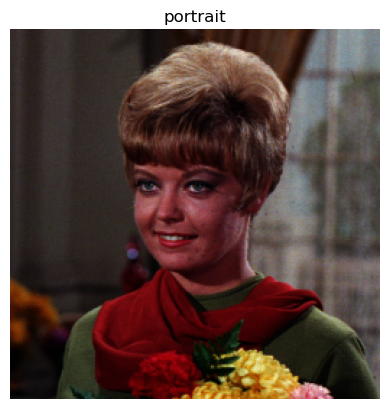

In [14]:
imgPortrait = plt.imread('dataset/portrait.png')
# Show the original image
show_image(imgPortrait, 'portrait')

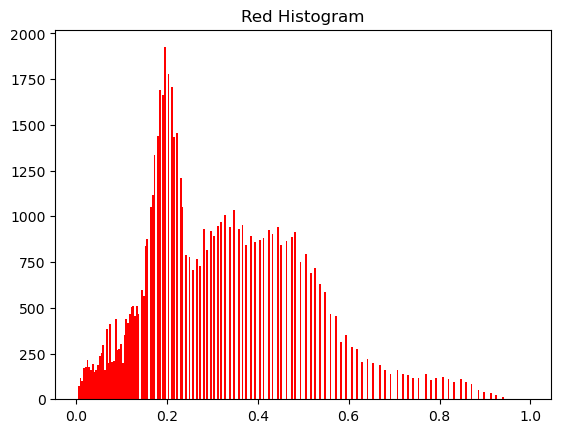

In [15]:
#image = plt.imread('dataset/portrait.png')

# Obtain the red channel
red_channel = imgPortrait[:, :, 0]

# Plot the the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red');

# Set title
plt.title('Red Histogram');

# Getting started with thresholding

* Thresholding
    * Partitioning an image into a foregraound and background
    vBy making it black and white
    * Simplest method of image segmentation

## Apply global thresholding
Apply global thresholding In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.

You'll see the resulting binarized image when using the show_image() function, previously explained.

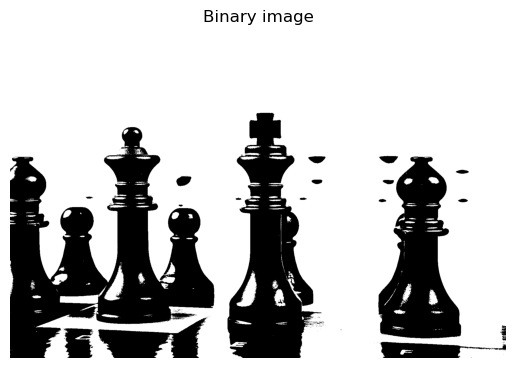

In [17]:
from skimage.filters import threshold_otsu

chess_pieces_image = plt.imread('dataset/bw.jpg')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.

In [25]:
page_image = plt.imread('dataset/text_page-1.png')

# Make the image grayscale using rgb2gray
page_image = color.rgb2gray(page_image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

ValueError: the input array must have size 3 along `channel_axis`, got (356, 720, 4)

In [26]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

Error in callback <function _draw_all_if_interactive at 0x126dc8e50> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>

## Trying other methods
not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

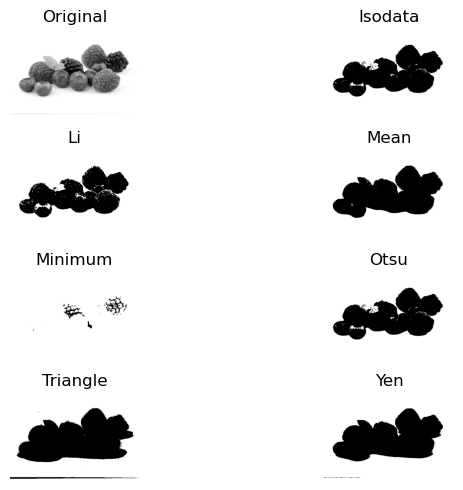

In [27]:
from skimage.filters import try_all_threshold

fruits_image = plt.imread('dataset/fruits-2.jpg')

# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);

## Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

![](dataset/shapes52.jpg)

What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

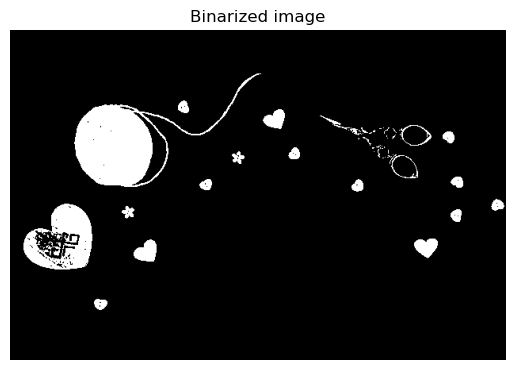

In [28]:
tools_image = plt.imread('dataset/shapes52.jpg')

# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')